In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# Note: altair is optional - uncomment if you want interactive visualizations
# import altair as alt
# alt.renderers.enable('default')

**Library choices**: matplotlib provides the foundation for all plotting, seaborn adds statistical visualizations and better defaults, and altair (optional) provides interactive web-based visualizations. Choose based on your needs - matplotlib for basic plots, seaborn for statistical analysis, altair for interactive dashboards.

## Part 1: Multi-Year Disease Surveillance Data

We'll work with realistic disease surveillance data that has trend, seasonality, and noise - typical characteristics of real-world medical time series data.

### Understanding the Data Structure

Disease surveillance data often has multiple components:
- **Trend**: Long-term direction (e.g., increasing cases over years)
- **Seasonality**: Repeating patterns (e.g., flu season peaks in winter)
- **Noise**: Random fluctuations around the pattern

Understanding these components helps you choose appropriate visualization and analysis techniques.

### Load and Prepare Data

Let's create realistic disease surveillance data with trend, seasonality, and noise. This simulates multi-year monthly case counts with seasonal patterns.

In [2]:
# Simulate multi-year disease surveillance data (3 years, monthly)
print("=== Disease Surveillance Data ===\n")

# Create monthly dates for 3 years
monthly_dates = pd.date_range('2020-01-01', periods=36, freq='ME')

# Generate realistic disease surveillance data with seasonality
n = len(monthly_dates)

# Base trend (slight increase over time)
trend = np.linspace(100, 120, n)

# Seasonal component (flu season peaks in winter)
seasonal = 20 * np.sin(2 * np.pi * np.arange(n) / 12) + 10

# Noise component
noise = np.random.normal(0, 5, n)

# Combine components
case_counts = trend + seasonal + noise
case_counts = np.maximum(case_counts, 0)  # No negative cases

# Create DataFrame with multiple sites
surveillance_data = pd.DataFrame({
    'cases': case_counts,
    'temperature': 60 + 30 * np.sin(2 * np.pi * np.arange(n) / 12) + np.random.normal(0, 2, n),
    'humidity': 50 + 20 * np.sin(2 * np.pi * np.arange(n) / 12 + np.pi) + np.random.normal(0, 3, n),
    'site': 'Site_A'
}, index=monthly_dates)

# Add second site
site_b_cases = case_counts * 0.8 + np.random.normal(0, 3, n)
site_b_cases = np.maximum(site_b_cases, 0)

site_b_data = pd.DataFrame({
    'cases': site_b_cases,
    'temperature': surveillance_data['temperature'] + np.random.normal(0, 1, n),
    'humidity': surveillance_data['humidity'] + np.random.normal(0, 2, n),
    'site': 'Site_B'
}, index=monthly_dates)

# Combine sites
surveillance_data = pd.concat([surveillance_data, site_b_data]).sort_index()

print(f"Surveillance data shape: {surveillance_data.shape}")
print(f"Date range: {surveillance_data.index.min()} to {surveillance_data.index.max()}")
print(f"\nSample data:")
print(surveillance_data.head(10))

=== Disease Surveillance Data ===

Surveillance data shape: (72, 4)
Date range: 2020-01-31 00:00:00 to 2022-12-31 00:00:00

Sample data:
                 cases  temperature   humidity    site
2020-01-31  112.483571    60.417727  49.892522  Site_A
2020-01-31   90.759508    60.677610  51.143857  Site_B
2020-02-29  119.880107    71.080660  44.693931  Site_A
2020-02-29   95.680748    71.862483  42.979616  Site_B
2020-03-31  131.701808    83.324390  24.820257  Site_A
2020-03-31   99.605133    82.087439  22.678472  Site_B
2020-04-30  139.329435    90.393722  32.465708  Site_A
2020-04-30  111.384006    89.073266  33.430652  Site_B
2020-05-31  128.435455    87.457695  32.940633  Site_A
2020-05-31  102.929055    87.979637  32.493708  Site_B


Notice how we've created data with multiple components: a gradual trend increase from 100 to 120 cases, a sine wave seasonal pattern peaking in winter months, and random noise fluctuations. This structure is typical of real-world medical data where long-term trends, seasonal patterns, and random variation all contribute to observations.

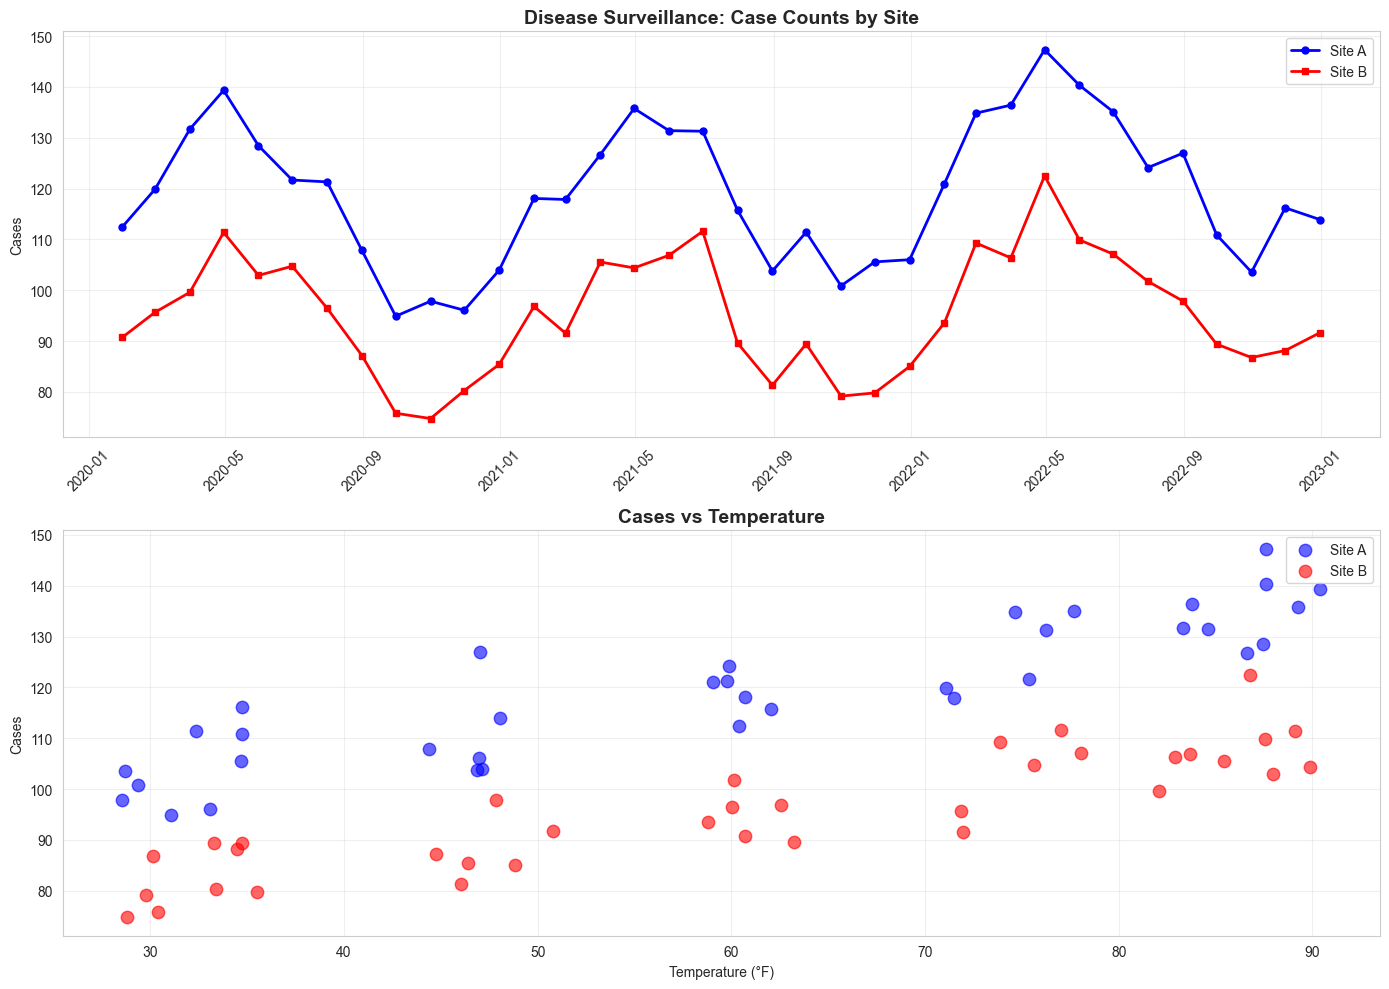

In [3]:
# Initial visualization of surveillance data
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Extract Site A and Site B for comparison
site_a = surveillance_data[surveillance_data['site'] == 'Site_A']
site_b = surveillance_data[surveillance_data['site'] == 'Site_B']

# Case counts over time for both sites
axes[0].plot(site_a.index, site_a['cases'], 
             marker='o', markersize=5, linewidth=2, label='Site A', color='blue')
axes[0].plot(site_b.index, site_b['cases'], 
             marker='s', markersize=5, linewidth=2, label='Site B', color='red')
axes[0].set_title('Disease Surveillance: Case Counts by Site', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cases')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Temperature and cases relationship
axes[1].scatter(site_a['temperature'], site_a['cases'], 
                alpha=0.6, s=80, label='Site A', color='blue')
axes[1].scatter(site_b['temperature'], site_b['cases'], 
                alpha=0.6, s=80, label='Site B', color='red')
axes[1].set_title('Cases vs Temperature', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Temperature (°F)')
axes[1].set_ylabel('Cases')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Part 2: Time Series Visualization with matplotlib

matplotlib provides the foundation for time series visualization. It's flexible and powerful, though it requires more code for polished plots than seaborn.

### Basic Time Series Plots

Basic time series plots reveal patterns that summary statistics miss. Line plots show trends over time, while histograms and box plots show distributions.

/var/folders/43/0jfkbfr53g1_nbv1ymsqgfl40000gp/T/ipykernel_37211/2651304494.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(monthly_data, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',


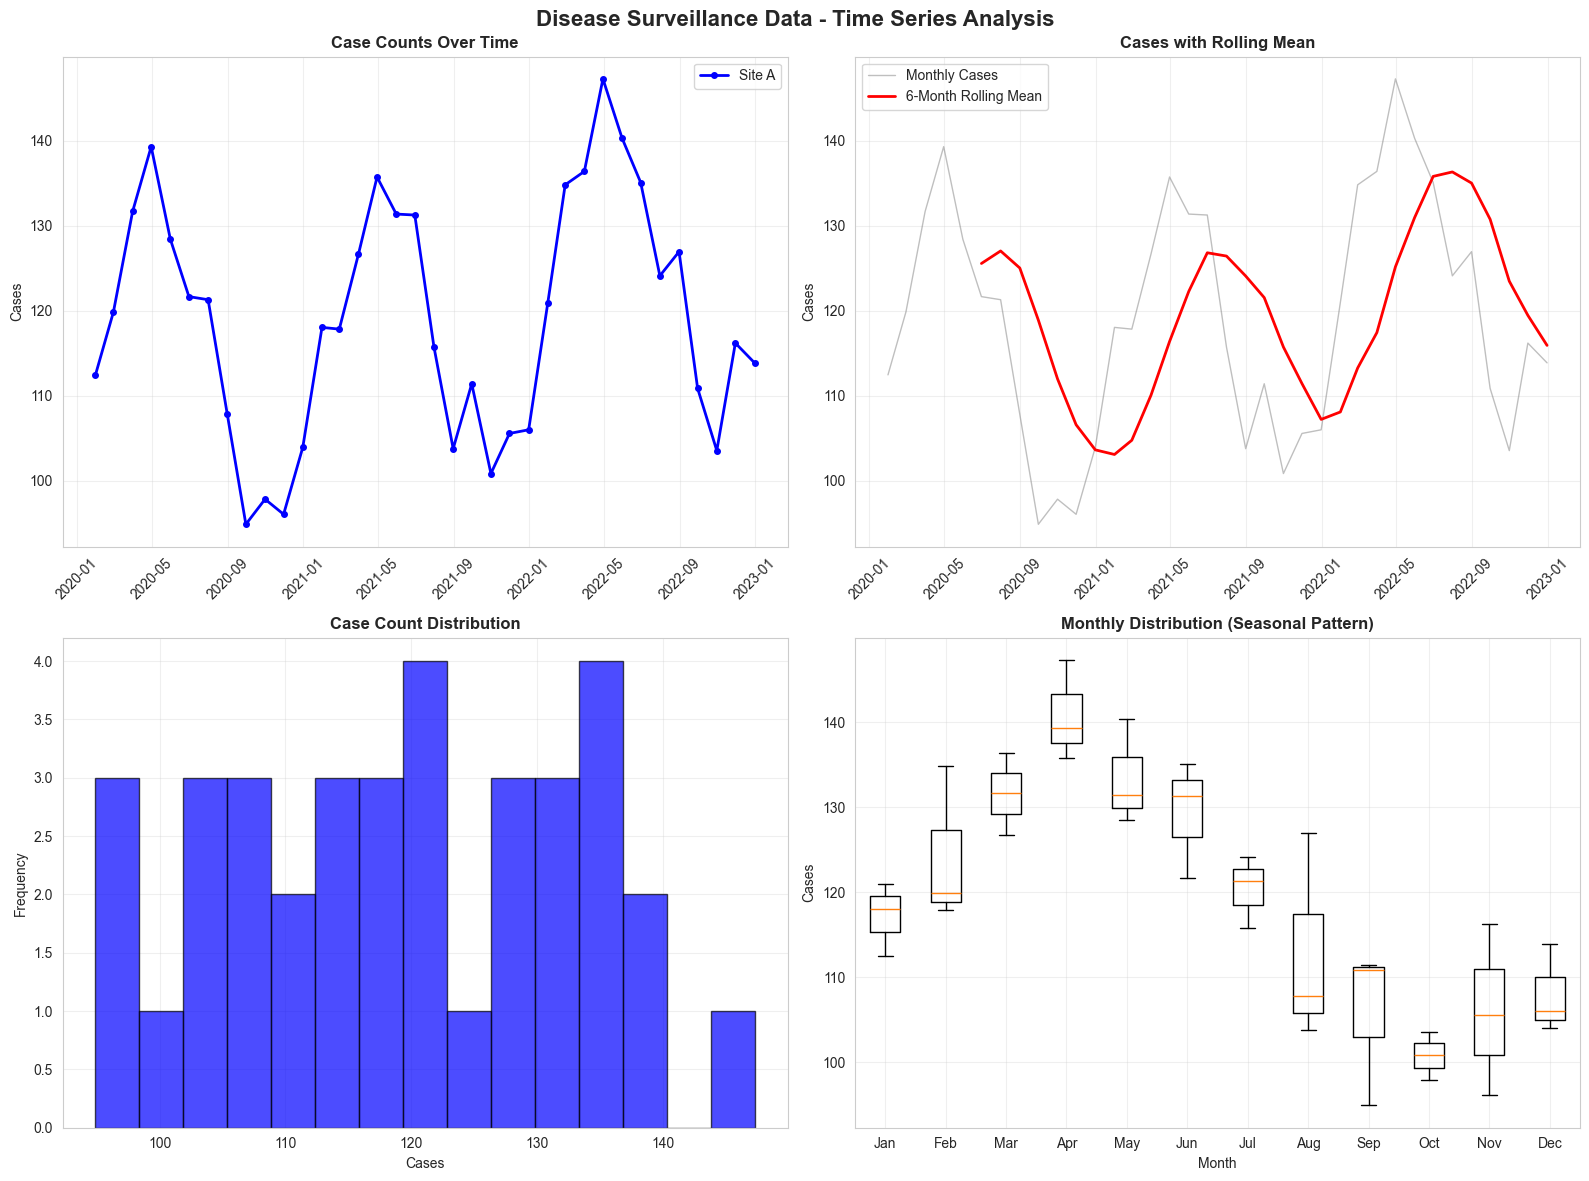

In [4]:
# Create comprehensive time series visualization with matplotlib
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Disease Surveillance Data - Time Series Analysis', fontsize=16, fontweight='bold')

# Extract Site A data for plotting
site_a = surveillance_data[surveillance_data['site'] == 'Site_A']

# Line plot (basic time series)
axes[0, 0].plot(site_a.index, site_a['cases'], 
                marker='o', markersize=4, linewidth=2, label='Site A', color='blue')
axes[0, 0].set_title('Case Counts Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Cases')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Time series with rolling mean
rolling_mean = site_a['cases'].rolling(window=6).mean()
axes[0, 1].plot(site_a.index, site_a['cases'], 
                alpha=0.5, linewidth=1, label='Monthly Cases', color='gray')
axes[0, 1].plot(rolling_mean.index, rolling_mean.values, 
                linewidth=2, label='6-Month Rolling Mean', color='red')
axes[0, 1].set_title('Cases with Rolling Mean', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Cases')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Distribution
axes[1, 0].hist(site_a['cases'], bins=15, alpha=0.7, edgecolor='black', color='blue')
axes[1, 0].set_title('Case Count Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Cases')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Box plot by month (seasonal pattern)
monthly_data = [site_a[site_a.index.month == i]['cases'].values for i in range(1, 13)]
axes[1, 1].boxplot(monthly_data, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1, 1].set_title('Monthly Distribution (Seasonal Pattern)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Cases')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Visualization**: Each plot reveals different aspects of the data:
- **Line plot**: Shows trends and patterns over time
- **Rolling mean**: Smooths out noise to reveal underlying trends
- **Histogram**: Shows the distribution of case counts
- **Box plot**: Reveals seasonal patterns by comparing distributions across months

## Part 3: Statistical Visualization with seaborn

seaborn builds on matplotlib to provide statistical visualizations with better defaults. It's particularly useful for comparing groups and identifying relationships.

### Multi-Variable Time Series with seaborn

seaborn excels at visualizing relationships between variables and comparing groups. This is especially useful for time series with multiple variables or sites.

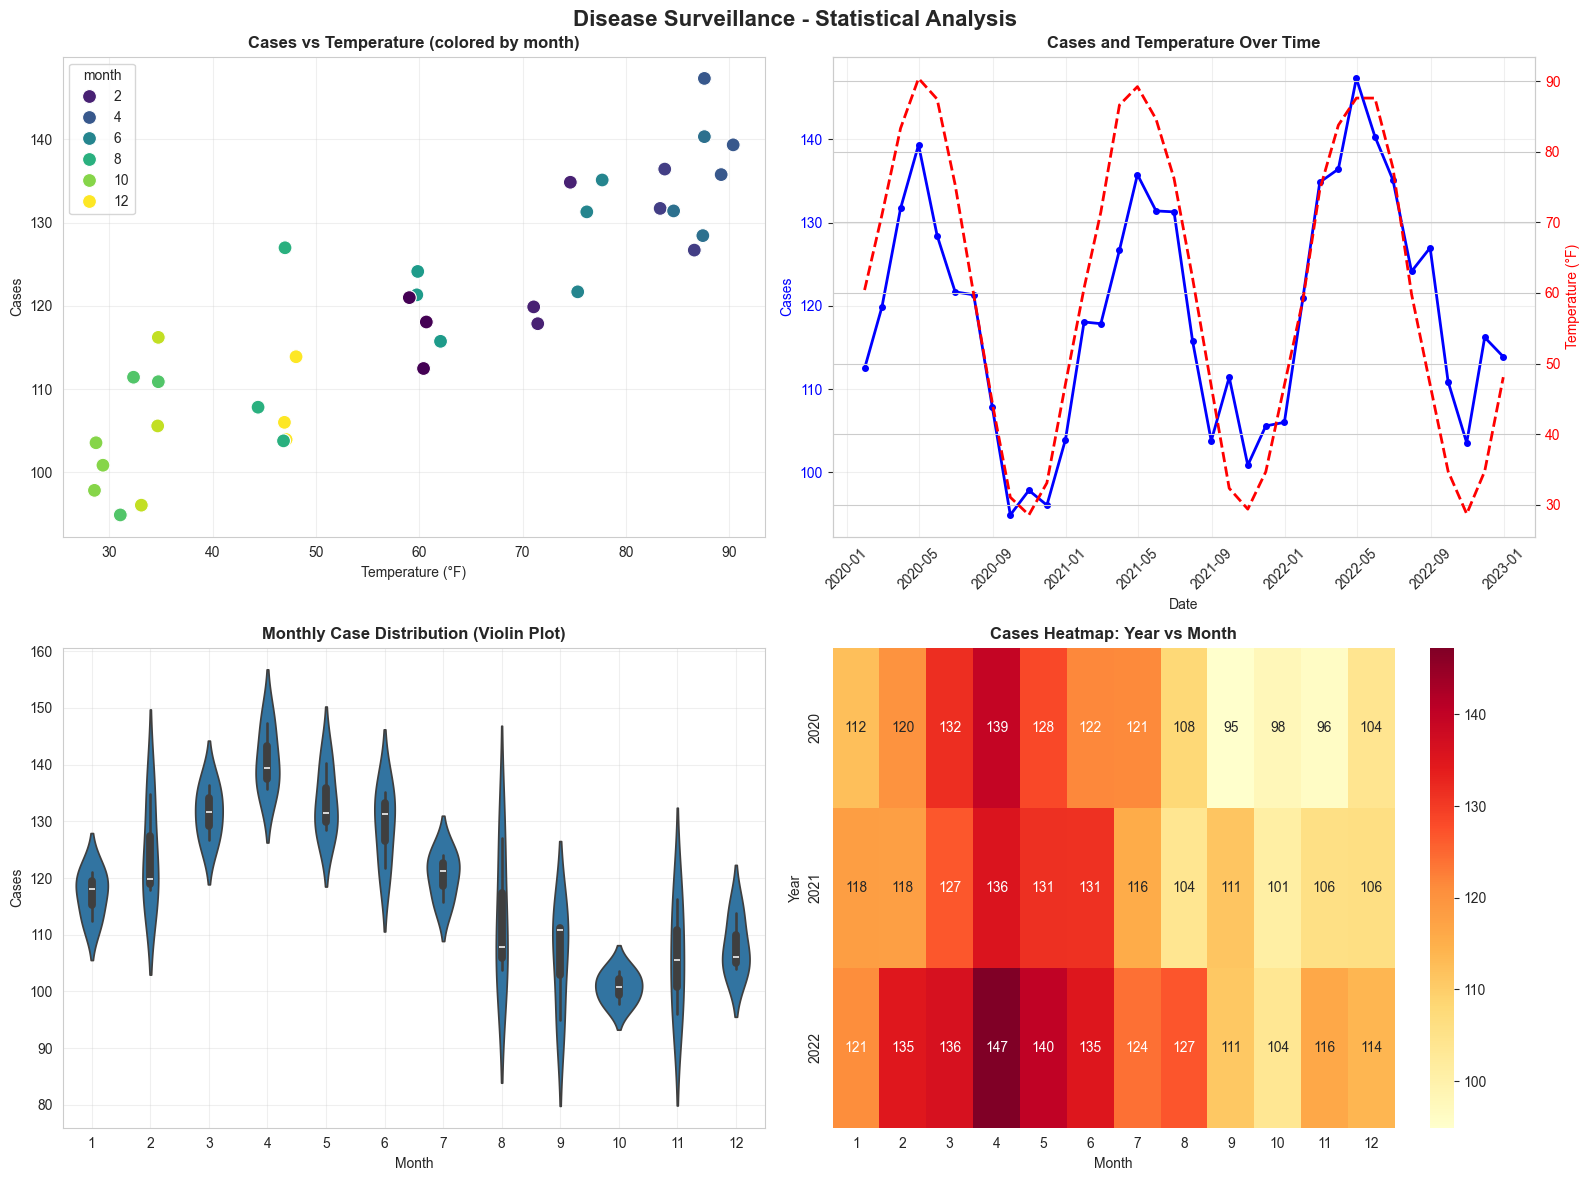

In [5]:
# Use seaborn for statistical visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Disease Surveillance - Statistical Analysis', fontsize=16, fontweight='bold')

# Prepare data for seaborn
site_a_long = site_a.reset_index()
# Rename the index column to 'date' for clarity
site_a_long = site_a_long.rename(columns={site_a_long.columns[0]: 'date'})
site_a_long['month'] = site_a_long['date'].dt.month
site_a_long['year'] = site_a_long['date'].dt.year

# Scatter plot: Cases vs Temperature
sns.scatterplot(data=site_a_long, x='temperature', y='cases', 
                hue='month', palette='viridis', ax=axes[0, 0], s=100)
axes[0, 0].set_title('Cases vs Temperature (colored by month)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Temperature (°F)')
axes[0, 0].set_ylabel('Cases')
axes[0, 0].grid(True, alpha=0.3)

# Line plot with multiple variables
ax_twin = axes[0, 1].twinx()
line1 = axes[0, 1].plot(site_a.index, site_a['cases'], 
                        color='blue', linewidth=2, label='Cases', marker='o', markersize=4)
line2 = ax_twin.plot(site_a.index, site_a['temperature'], 
                     color='red', linewidth=2, label='Temperature', linestyle='--')
axes[0, 1].set_title('Cases and Temperature Over Time', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Cases', color='blue')
ax_twin.set_ylabel('Temperature (°F)', color='red')
axes[0, 1].tick_params(axis='y', labelcolor='blue')
ax_twin.tick_params(axis='y', labelcolor='red')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Violin plot by month (distribution shape)
sns.violinplot(data=site_a_long, x='month', y='cases', ax=axes[1, 0])
axes[1, 0].set_title('Monthly Case Distribution (Violin Plot)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Cases')
axes[1, 0].grid(True, alpha=0.3)

# Heatmap: Cases by month and year
heatmap_data = site_a_long.pivot(index='year', columns='month', values='cases')
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1, 1])
axes[1, 1].set_title('Cases Heatmap: Year vs Month', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Year')

plt.tight_layout()
plt.show()

The scatter plot reveals relationships between temperature and cases, colored by month to show seasonal patterns. The dual-axis plot allows comparison of two variables with different scales on the same plot. The violin plot shows distribution shapes, revealing how case distributions vary by month. The heatmap provides a comprehensive view of patterns across years and months, making seasonal trends obvious.

## Part 4: Visualizing Time Series Components

Real-world time series data often contains multiple components: trend, seasonality, and noise. Visualizing these components separately helps understand the underlying patterns and is a fundamental skill in time series analysis.

### Understanding Time Series Components

Before we can decompose a time series, it's helpful to see how components combine. Let's create a synthetic time series with known components and visualize them separately.

=== Visualizing Time Series Components ===



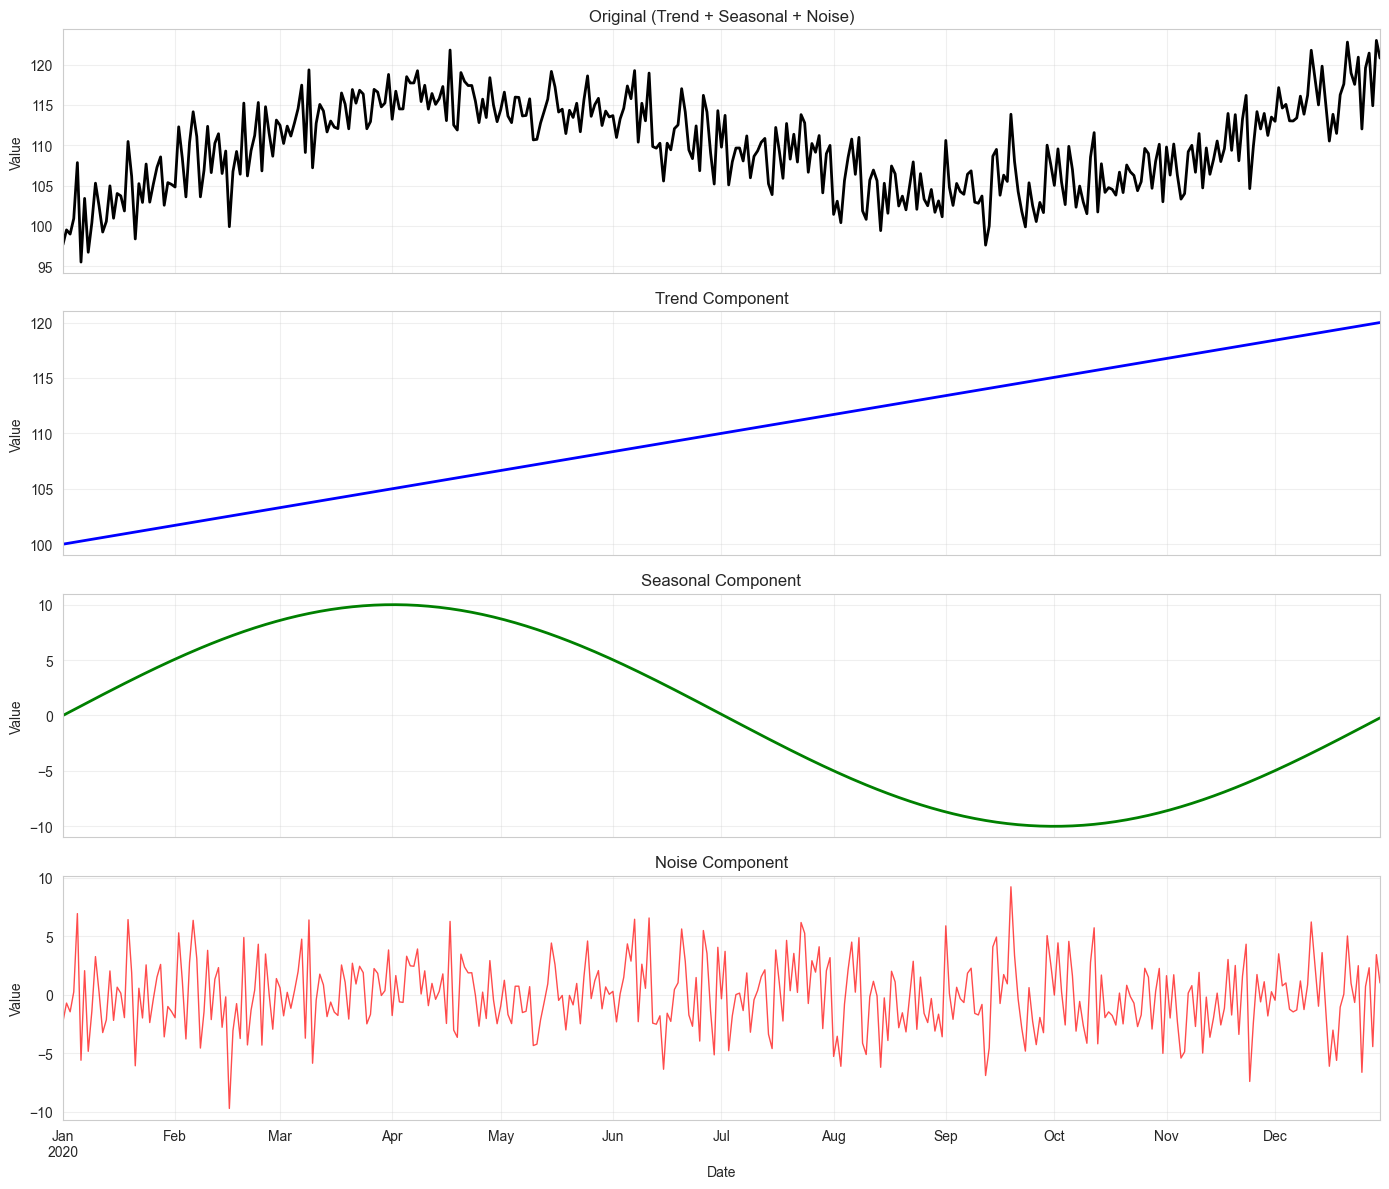

In [6]:
# Visualize time series components separately
print("=== Visualizing Time Series Components ===\n")

# Create time series with known components
dates = pd.date_range('2020-01-01', periods=365, freq='D')
trend_component = np.linspace(100, 120, 365)  # Long-term trend
seasonal_component = 10 * np.sin(2 * np.pi * np.arange(365) / 365.25)  # Seasonal pattern
noise_component = np.random.randn(365) * 3  # Random noise
combined = trend_component + seasonal_component + noise_component
ts_combined = pd.Series(combined, index=dates)

# Visualize components separately
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# Original combined series
ts_combined.plot(ax=axes[0], title='Original (Trend + Seasonal + Noise)', color='black', linewidth=2)
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# Trend component
pd.Series(trend_component, index=dates).plot(ax=axes[1], title='Trend Component', color='blue', linewidth=2)
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

# Seasonal component
pd.Series(seasonal_component, index=dates).plot(ax=axes[2], title='Seasonal Component', color='green', linewidth=2)
axes[2].set_ylabel('Value')
axes[2].grid(True, alpha=0.3)

# Noise component
pd.Series(noise_component, index=dates).plot(ax=axes[3], title='Noise Component', color='red', alpha=0.7, linewidth=1)
axes[3].set_ylabel('Value')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Component visualization**: Seeing each component separately helps you understand how they contribute to the overall pattern. The trend shows long-term direction, the seasonal component shows repeating patterns, and the noise shows random variation. This visualization is essential for understanding real-world time series data.

### Seasonal Pattern Analysis

Seasonal patterns are common in medical data - flu season peaks in winter, allergies peak in spring, etc. Identifying and visualizing these patterns is crucial for understanding disease dynamics.

=== Seasonal Pattern Analysis ===

Average cases by month:
Month  1:  117.2 cases (std: 4.3)
Month  2:  124.2 cases (std: 9.3)
Month  3:  131.6 cases (std: 4.9)
Month  4:  140.8 cases (std: 5.9)
Month  5:  133.4 cases (std: 6.2)
Month  6:  129.4 cases (std: 6.9)
Month  7:  120.4 cases (std: 4.3)
Month  8:  112.9 cases (std: 12.4)
Month  9:  105.7 cases (std: 9.4)
Month 10:  100.8 cases (std: 2.9)
Month 11:  106.0 cases (std: 10.1)
Month 12:  108.0 cases (std: 5.2)


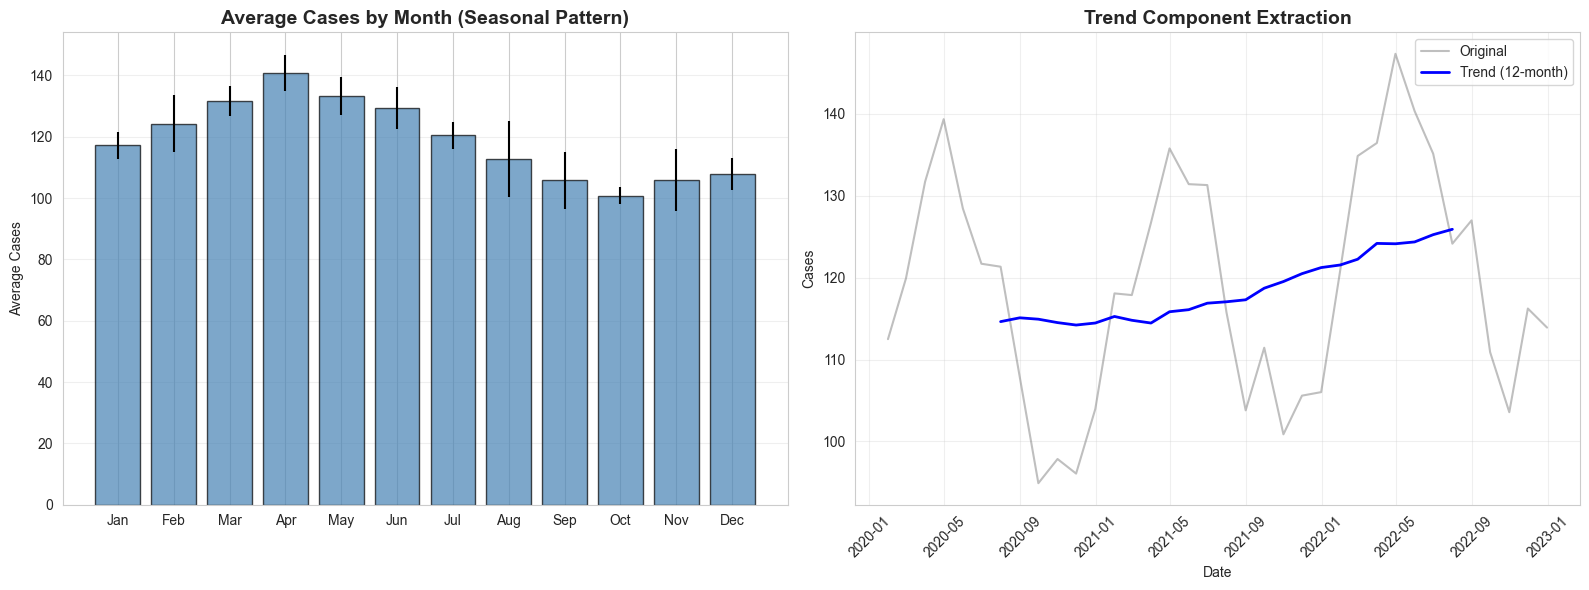

In [7]:
# Analyze seasonal patterns in real data
print("=== Seasonal Pattern Analysis ===\n")

# Group by month to identify seasonal pattern
monthly_avg = site_a.groupby(site_a.index.month)['cases'].mean()
monthly_std = site_a.groupby(site_a.index.month)['cases'].std()

print("Average cases by month:")
for month, avg in monthly_avg.items():
    print(f"Month {month:2d}: {avg:6.1f} cases (std: {monthly_std[month]:.1f})")

# Visualize seasonal pattern
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Monthly average bar chart
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].bar(month_names, monthly_avg.values, yerr=monthly_std.values, 
           alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_title('Average Cases by Month (Seasonal Pattern)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Cases')
axes[0].grid(True, alpha=0.3, axis='y')

# Trend extraction from real data
trend = site_a['cases'].rolling(window=12, center=True).mean()
seasonal = site_a['cases'] - trend
residual = seasonal - site_a['cases'].groupby(site_a.index.month).transform('mean')

axes[1].plot(site_a.index, site_a['cases'], alpha=0.5, label='Original', color='gray')
axes[1].plot(site_a.index, trend, linewidth=2, label='Trend (12-month)', color='blue')
axes[1].set_title('Trend Component Extraction', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cases')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The monthly averages reveal seasonal patterns - notice how some months consistently have higher or lower case counts. The trend component shows the long-term direction after removing seasonal effects. This decomposition helps you understand what's driving changes in case counts.

*Note: For advanced seasonal decomposition techniques (like STL decomposition), see the BONUS.md section on advanced time series decomposition.*

## Part 5: Integration with Earlier Concepts

Let's combine all the concepts we've learned - indexing, resampling, rolling windows, and visualization - into a comprehensive analysis.

### Combining Resampling, Rolling Windows, and Visualization

Real-world analysis requires combining multiple techniques. Let's create daily data, resample to different frequencies, apply rolling windows, and visualize everything together.

=== Integration: Resampling + Rolling + Visualization ===



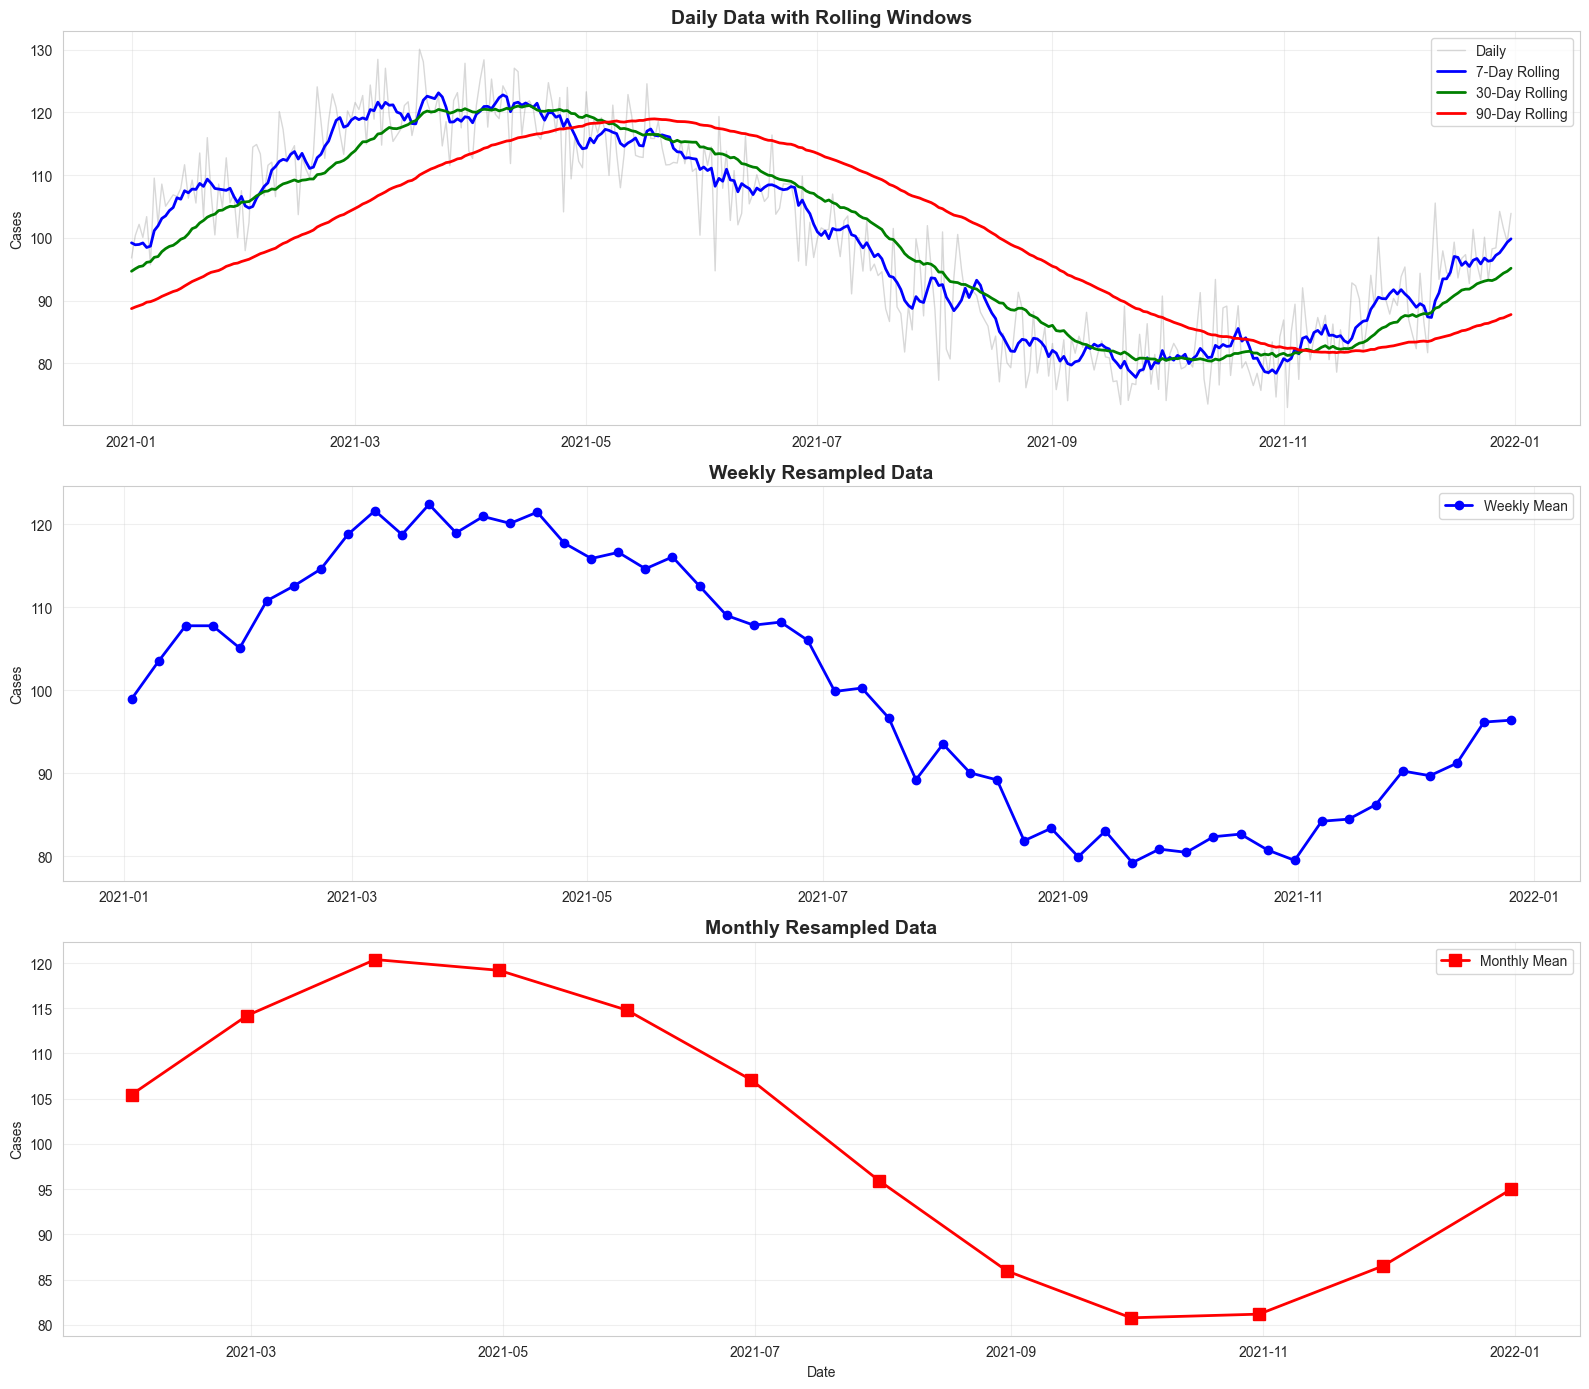

In [8]:
# Integrate all concepts: resampling, rolling windows, and visualization
print("=== Integration: Resampling + Rolling + Visualization ===\n")

# Create daily data and resample to different frequencies
daily_dates = pd.date_range('2020-01-01', periods=365*3, freq='D')
daily_cases = 100 + 20 * np.sin(2 * np.pi * np.arange(len(daily_dates)) / 365.25) + np.random.normal(0, 5, len(daily_dates))
daily_cases = np.maximum(daily_cases, 0)
daily_ts = pd.DataFrame({'cases': daily_cases}, index=daily_dates)

# Resample to different frequencies
weekly_ts = daily_ts['cases'].resample('W').mean()
monthly_ts = daily_ts['cases'].resample('ME').mean()

# Calculate rolling statistics
daily_ts['rolling_7d'] = daily_ts['cases'].rolling(window=7).mean()
daily_ts['rolling_30d'] = daily_ts['cases'].rolling(window=30).mean()
daily_ts['rolling_90d'] = daily_ts['cases'].rolling(window=90).mean()

# Create comprehensive visualization
fig, axes = plt.subplots(3, 1, figsize=(16, 14))

# Original daily with rolling windows
sample_data = daily_ts.loc['2021-01-01':'2021-12-31']
axes[0].plot(sample_data.index, sample_data['cases'], 
             alpha=0.3, linewidth=1, label='Daily', color='gray')
axes[0].plot(sample_data.index, sample_data['rolling_7d'], 
             linewidth=2, label='7-Day Rolling', color='blue')
axes[0].plot(sample_data.index, sample_data['rolling_30d'], 
             linewidth=2, label='30-Day Rolling', color='green')
axes[0].plot(sample_data.index, sample_data['rolling_90d'], 
             linewidth=2, label='90-Day Rolling', color='red')
axes[0].set_title('Daily Data with Rolling Windows', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cases')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Weekly resampled
weekly_sample = weekly_ts['2021-01-01':'2021-12-31']
axes[1].plot(weekly_sample.index, weekly_sample.values, 
             marker='o', markersize=6, linewidth=2, label='Weekly Mean', color='blue')
axes[1].set_title('Weekly Resampled Data', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Cases')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Monthly resampled
monthly_sample = monthly_ts['2021-01-01':'2021-12-31']
axes[2].plot(monthly_sample.index, monthly_sample.values, 
             marker='s', markersize=8, linewidth=2, label='Monthly Mean', color='red')
axes[2].set_title('Monthly Resampled Data', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Cases')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

This comprehensive visualization demonstrates how different techniques reveal different aspects of the data. Daily data with rolling windows shows short-term fluctuations and multiple time scales of trends. Weekly resampled data smooths out daily noise while preserving weekly patterns. Monthly resampled data shows long-term trends and seasonal patterns. Each view serves a different purpose - use daily views for detailed analysis, weekly for trend identification, and monthly for long-term patterns.
